#                                Naive Bayes Classifier Lab 2


# Group Members: Percy Mohlala (1810589),  Nhlalala Maluleke (1836213)
                               

In [645]:
import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
import matplotlib
import sklearn
import random
import nltk
import seaborn as sns
import matplotlib as plt

In [366]:
col_names = ["label","Review"]
dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/simple-food-reviews.txt", names = col_names)

In [367]:
dataset.head(10)

,label,Review
0,1,the food is lovely
1,1,this is a great restaurant
2,1,i really enjoyed my food
3,1,i enjoyed the experience at the restaurant
4,1,we had a lovely meal
5,1,my food tasted great
6,1,the service was great
7,1,what a lovely restaurant
8,1,the food the service and the restaurant was g...
9,-1,the service is terrible


# 1. a) Training the model using 12 random reviews with Laplace smoothing

In [397]:
from sklearn.model_selection import train_test_split

#Split the dataset randomly into training and testing data using a 67/33 split
X_train, X_test, y_train, y_test = train_test_split(dataset.Review, dataset.label, test_size=0.33) 


In [398]:
from sklearn.feature_extraction.text import CountVectorizer

##Create a bag of words by treating each review as a vector 
##Each entry in the review's vector representation represents the presence of a word from our dictionary of words
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
print("This is our training set" + '\n')
print(X_train)

print('\n' + "This is the array representation of the first five reviews of our training set with the frequency of each word")
X_train_count.toarray()[:5]

This is our training set

8      the food the service and the restaurant was g...
4                                  we had a lovely meal
14                         we had a terrible experience
2                              i really enjoyed my food
1                            this is a great restaurant
5                                  my food tasted great
12                              the food was really bad
16                                       avoid the food
9                               the service is terrible
10                                the food tasted awful
17                                the meal was terrible
15                                avoid this restaurant
Name: Review, dtype: object

This is the array representation of the first five reviews of our training set with the frequency of each word


array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]],
      dtype=int64)

In [399]:
from sklearn.naive_bayes import MultinomialNB

##Here we train our model using the Multinomial Naive Bayes Classifier from the scikit learn library
nbClassifier = MultinomialNB(alpha=1.0)
nbClassifier.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### The above output shows that we've used α=1  to smooth the table of likelihoods

The model has an accuracy of 0.8333
This means that 83.33% of the reviews were predicted correctly
The confusion matrix is:
[[2 0]
 [1 3]]
Here's a nice visual form of the matrix


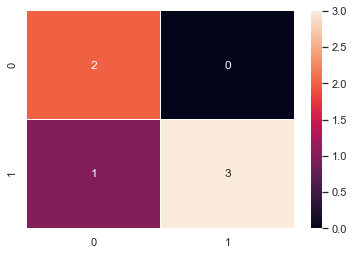

In [400]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_test_count = cv.transform(X_test)

y_pred = nbClassifier.predict(X_test_count)
acc_score = round(accuracy_score(y_test, y_pred),4)
conf_matrix = confusion_matrix(y_test, y_pred )
print("The model has an accuracy of " + str(acc_score) + '\n' + "This means that " + str(100*acc_score) + "% of the reviews were predicted correctly"  )
print("The confusion matrix is:")
print(conf_matrix )
#True_pos = str(conf_matrix[0,0])
#True_neg = str(conf_matrix[1,1])
#False_pos = str(conf_matrix[0,1])
#False_neg = str(conf_matrix[1,0])
#print('\n' + "True positives: " + True_pos + '\n' + "True negatives: " + True_neg + '\n' + "False positives: " + False_pos + '\n' + "False negatives: " + False_neg)
print("Here's a nice visual form of the matrix")
sns.heatmap(conf_matrix, annot=True, linewidths=.1)

# 1.b) Training the model on all the reviews

In [401]:
X_train = dataset['Review']
y_train = dataset['label']
X_train_count = cv.fit_transform(X_train.values)


In [402]:
##Training our model
nbClassifier.fit(X_train_count, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [403]:
new_reviews = ["The restaurant was not bad", "The food was not great"]
new_reviews_count = cv.transform(new_reviews)
outcomes = nbClassifier.predict(new_reviews_count)
a = 0
for i in outcomes:
    if i == 1:
        print("The review " +'"' + (new_reviews[a]) + '"' + " was predicted to be positive")
        a+=1
    else:
        print("The review " +'"' + new_reviews[a] + '"' + " was predicted to be negative")
        a+=1

The review "The restaurant was not bad" was predicted to be negative
The review "The food was not great" was predicted to be positive


## Review 1 confused the model because it contains the word bad which is associated mostly with negative reviews and review 2 contains the word great which is associated mostly with positive reviews in our corpus  

# 1.c) Training model without Laplace smoothing

In [424]:
#Split the dataset randomly into training and testing data using a 67/33 split
X_train, X_test, y_train, y_test = train_test_split(dataset.Review, dataset.label, test_size=0.33) 

In [425]:
##Create a bag of words by treating each review as a vector 
##Each entry in the review's vector representation represents the presence of a word from our dictionary of words
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
print("This is our training set" + '\n')
print(X_train)

print('\n' + "This is the array representation of the first five reviews of our training set with the frequency of each word")
X_train_count.toarray()[:5]

This is our training set

13                the service and the food was terrible
4                                  we had a lovely meal
10                                the food tasted awful
2                              i really enjoyed my food
3            i enjoyed the experience at the restaurant
17                                the meal was terrible
15                                avoid this restaurant
6                                 the service was great
8      the food the service and the restaurant was g...
16                                       avoid the food
5                                  my food tasted great
0                                    the food is lovely
Name: Review, dtype: object

This is the array representation of the first five reviews of our training set with the frequency of each word


array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0]],
      dtype=int64)

In [426]:
from sklearn.naive_bayes import MultinomialNB

##Here we train our model using the Multinomial Naive Bayes Classifier with α=0
nbClassifier = MultinomialNB(alpha=0.0, fit_prior=True, class_prior=None)
nbClassifier.fit(X_train_count, y_train)

C:\Users\percy\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True)

The model has now has an accuracy of 0.6667
This means that our model has a chance of 66.67% of getting the correct predictions
The confusion matrix is:
[[2 2]
 [0 2]]
Here's a nice visual form of the matrix


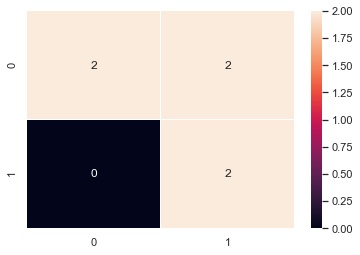

In [427]:

X_test_count = cv.transform(X_test)

y_pred = nbClassifier.predict(X_test_count)
acc_score = round(accuracy_score(y_test, y_pred),4)
conf_matrix = confusion_matrix(y_test, y_pred )
print("The model has now has an accuracy of " + str(acc_score) + '\n' + "This means that our model has a chance of " + str(100*acc_score) + "% of getting the correct predictions"  )
print("The confusion matrix is:")
print(conf_matrix )
#True_pos = str(conf_matrix[0,0])
#True_neg = str(conf_matrix[1,1])
#False_pos = str(conf_matrix[0,1])
#False_neg = str(conf_matrix[1,0])
#print('\n' + "True positives: " + True_pos + '\n' + "True negatives: " + True_neg + '\n' + "False positives: " + False_pos + '\n' + "False negatives: " + False_neg)
print("Here's a nice visual form of the matrix")
sns.heatmap(conf_matrix, annot=True, linewidths=.1)

##  We've noticed that without Laplace smoothing, our model's prediction success rate goes down and the chances of predict unseen reviews correctly decreases 

# 1.d) Training model with the stop words having been removed

In [428]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [429]:
#Creating a list of words with size 1 or 2      
stop_words = []

for i in dataset['Review']:
     r = i.split()
     for j in r:
        if len(j)==1 or len(j)==2:
            stop_words.append(j)
    
#remove repeated words from our list    
stop_words = list( dict.fromkeys(stop_words) )

In [430]:
print(stop_words)

['is', 'a', 'i', 'my', 'at', 'we']


In [431]:

def remove_stop_words(sentence):
    sent_words = sentence.split()
    
    resultwords  = [word for word in sent_words if word.lower() not in stop_words]
    result = ' '.join(resultwords)
    
    return result 


In [432]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, stop_words=stop_words)
#removing stop words from our dataset

Y = dataset.label

X = vectorizer.fit_transform(dataset.Review)
print(X.shape)
#print(Y.shape




(18, 20)


## initially we had 26 unique words, after removing the stop words we now have 20 unique words in our corpus

In [532]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) 

In [533]:
nbClassifier = MultinomialNB(alpha=1.0)
nbClassifier.fit(X_train,y_train)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

The model has now has an accuracy of 0.8333
This means that our model has a 83.33% chance of getting the correct predictions
The confusion matrix is:
[[2 1]
 [0 3]]

Here's a nice visual form of the matrix


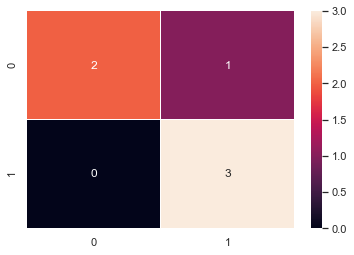

In [535]:
y_pred = nbClassifier.predict(X_test)

acc_score = round(accuracy_score(y_test, y_pred),4)
conf_matrix = confusion_matrix(y_test, y_pred )
print("The model has now has an accuracy of " + str(acc_score) + '\n' + "This means that our model has a " + str(100*acc_score) + "% chance of getting the correct predictions"  )
print("The confusion matrix is:")
print(conf_matrix )
#True_pos = str(conf_matrix[0,0])
#True_neg = str(conf_matrix[1,1])
#False_pos = str(conf_matrix[0,1])
#False_neg = str(conf_matrix[1,0])
#print('\n' + "True positives: " + True_pos + '\n' + "True negatives: " + True_neg + '\n' + "False positives: " + False_pos + '\n' + "False negatives: " + False_neg)
print('\n'"Here's a nice visual form of the matrix")
sns.heatmap(conf_matrix, annot=True, linewidths=.1)

# Question 2

# 2.a)

In [584]:
col_names = ['Page','Book_number']
book1 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP1.txt", names = col_names)
book2 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP2.txt", names = col_names)
book3 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP3.txt", names = col_names)
book4 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP4.txt", names = col_names)
book5 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP5.txt", names = col_names)
book6 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP6.txt", names = col_names)
book7 = dataset = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/HP7.txt", names = col_names)

In [585]:
book1.head(4)

,Page,Book_number
0,mr and mrs dursley of number four privet drive...,NaN
1,met for several years; in fact mrs dursley pre...,NaN
2,the cat it stared back as mr dursley drove aro...,NaN
3,calls and shouted a bit more he was in a very ...,NaN


In [586]:
book1.Book_number = 1
book2.Book_number = 2
book3.Book_number = 3
book4.Book_number = 4
book5.Book_number = 5
book6.Book_number = 6
book7.Book_number = 7

In [587]:
book1.head(2)


,Page,Book_number
0,mr and mrs dursley of number four privet drive...,1
1,met for several years; in fact mrs dursley pre...,1


In [588]:
book2.head(2)

,Page,Book_number
0,the worst birthday not for the first time an a...,2
1,i want more bacon theres more in the frying pa...,2


In [589]:
book3.head(2)

,Page,Book_number
0,owl post harry potter was a highly unusual boy...,3
1,nonmagic people more commonly known as muggles...,3


In [590]:
book4.head(2)

,Page,Book_number
0,the riddle house the villagers of little hangl...,4
1,kept and impressive a maid had entered the dr...,4


In [591]:
book5.head(2)

,Page,Book_number
0,dudley demented the hottest day of the summer ...,5
1,punishable by law but as he had hidden himself...,5


In [592]:
book6.head(2)

,Page,Book_number
0,the other minister it was nearing midnight and...,6
1,supposed to have stopped that bridge collapsin...,6


In [593]:
book7.head(2)

,Page,Book_number
0,the dark lord ascending the two men appeared o...,7
1,snape nodded but did not elaborate they turned...,7


In [594]:
dataset = book1.append([book2, book3, book4, book5, book6, book7], ignore_index=True)

In [595]:
dataset

,Page,Book_number
0,mr and mrs dursley of number four privet drive...,1
1,met for several years; in fact mrs dursley pre...,1
2,the cat it stared back as mr dursley drove aro...,1
3,calls and shouted a bit more he was in a very ...,1
4,he found it a lot harder to concentrate on dri...,1
...,...,...
4695,back on the platform they found lily and hugo ...,7
4696,youre right sorry said ron but unable to help ...,7
4697,no said harry firmly you and a1 will share a r...,7
4698,ginny kissed albus goodbye see you at christma...,7


In [596]:
X_train, X_test, y_train, y_test = train_test_split(dataset.Page, dataset.Book_number, test_size=0.2)

In [597]:
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
print("Here's a few examples taken from our training set" + '\n')
print(X_train)

Here's a few examples taken from our training set

1359    that mark barked mr crouch harry potter  and m...
1068    horrified he looked around malfoy had thrown h...
4308    gave it to his son and then he greeted death a...
1938     just answer no  i wont do it i wont say it  j...
1075    had no time or opportunity to go and see hagri...
                              ...                        
768      there you are harry said a voice before harry...
1015    ruddy brilliant boomed hagrid over the heads o...
1242     uncle vernon finished reading put his hand ba...
668     the entrance to the chamber of secrets he said...
3996    times change said hermione now show us that de...
Name: Page, Length: 3760, dtype: object


In [598]:
nbClassifier = MultinomialNB(alpha=1.0)
nbClassifier.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Our model has an accuracy of: 0.7213
This means that our model has a 72.13% chance of getting the correct predictions
The confusion matrix is:
[[ 26   3   3  11  26   0   4]
 [  0  25   2  10  26   5   7]
 [  2   0  51  11  26   3   1]
 [  0   0   0 137  21   2   6]
 [  0   2   0   4 203   7  10]
 [  0   0   0   1  32  99  13]
 [  0   0   0   3  17   4 137]]

Below is a visual representation of the confusion matrix


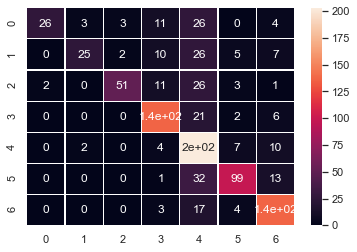

In [600]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_test_count = cv.transform(X_test)

y_pred = nbClassifier.predict(X_test_count)
acc_score = round(accuracy_score(y_test, y_pred),4)
conf_matrix = confusion_matrix(y_test, y_pred )
print("Our model has an accuracy of: " + str(acc_score))
print("This means that our model has a " + str(round(100*acc_score,2)) + "% chance of getting the correct predictions"  )
print("The confusion matrix is:")
print(conf_matrix )
print('\n' + "Below is a visual representation of the confusion matrix")
sns.heatmap(conf_matrix, annot=True, linewidths=.1)

# 2.b) Using different smoothing values

In [601]:
##Here we create a function that splits the dataset into training, testing, and validation sets with on an 80/10/10 split

def train_validate_test_split(df, train_percent=.8, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test



In [602]:
train, validate, test = train_validate_test_split(dataset)


In [603]:
dataset.shape

(4700, 2)

In [604]:
train.shape

(3760, 2)

In [605]:
test.shape

(470, 2)

In [606]:
validate.shape

(470, 2)

In [607]:
nbClassifier1 = MultinomialNB(alpha = 1e-1)
nbClassifier2 = MultinomialNB(alpha = 1e-2)
nbClassifier3 = MultinomialNB(alpha = 1e-3)
nbClassifier4 = MultinomialNB(alpha = 1e-4)
nbClassifier5 = MultinomialNB(alpha = 1e-5)
nbClassifier6 = MultinomialNB(alpha = 1e-6)


In [613]:
X_train = train.Page
y_train = train.Book_number

X_test = test.Page
y_test = test.Book_number

X_validate = validate.Page
y_validate = validate.Book_number



In [623]:
X_train_count = cv.fit_transform(X_train.values)
nbClassifier1.fit(X_train_count, y_train)



MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [624]:
nbClassifier2.fit(X_train_count, y_train)


MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [625]:
nbClassifier3.fit(X_train_count, y_train)


MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [626]:
nbClassifier4.fit(X_train_count, y_train)


MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [627]:
nbClassifier5.fit(X_train_count, y_train)


MultinomialNB(alpha=1e-05, class_prior=None, fit_prior=True)

In [628]:
nbClassifier6.fit(X_train_count, y_train)

MultinomialNB(alpha=1e-06, class_prior=None, fit_prior=True)

In [632]:
X_validate_count = cv.transform(X_validate)

indices = np.zeros(6)

print("The different models perfomed as follows based on the validation data:" + "\n")

y_pred = nbClassifier1.predict(X_validate_count)
acc_score = round(accuracy_score(y_validate, y_pred),4)
print("Model 1 has an accuracy of " + str(acc_score))
indices[0] = acc_score

y_pred = nbClassifier2.predict(X_validate_count)
acc_score = round(accuracy_score(y_validate, y_pred),4)
print("Model 2 has an accuracy of " + str(acc_score))
indices[1] = acc_score

y_pred = nbClassifier3.predict(X_validate_count)
acc_score = round(accuracy_score(y_validate, y_pred),4)
print("Model 3 has an accuracy of " + str(acc_score))
indices[2] = acc_score

y_pred = nbClassifier4.predict(X_validate_count)
acc_score = round(accuracy_score(y_validate, y_pred),4)
print("Model 4 has an accuracy of " + str(acc_score))
indices[3] = acc_score

y_pred = nbClassifier5.predict(X_validate_count)
acc_score = round(accuracy_score(y_validate, y_pred),4)
print("Model 5 has an accuracy of " + str(acc_score))
indices[4] = acc_score

y_pred = nbClassifier6.predict(X_validate_count)
acc_score = round(accuracy_score(y_validate, y_pred),4)
print("Model 6 has an accuracy of " + str(acc_score))
indices[5] = acc_score

rate = 0.0
best_model = 0

for i in range(6):
    if indices[i]>rate:
        rate = indices[i]
        best_model = i + 1

print('\n' + "The best model is model " + str(best_model) +" as it has the highest accuracy")
    


The different models perfomed as follows based on the validation data:

Model 1 has an accuracy of 0.8255
Model 2 has an accuracy of 0.8128
Model 3 has an accuracy of 0.7638
Model 4 has an accuracy of 0.7426
Model 5 has an accuracy of 0.7191
Model 6 has an accuracy of 0.6872

The best model is model 1 as it has the highest accuracy


## Based on the above results, we can see that the choice of smoothing value has a huge impact on the perfomance of a model. A higher smoothing value results in a more accurate model while a smaller smoothing value results in a model that's not too accurate.

# 2.c)

The confusion matrix of our best model(model 1) is :

[[31  1  2  0  2  0  0]
 [ 1 39  0  2  1  5  0]
 [ 0  1 41  1  3  4  2]
 [ 3  1  1 68  4  4  5]
 [ 3  0  1  5 91  8  4]
 [ 0  1  1  0  8 43  8]
 [ 3  0  1  1  6  5 59]]

Below is a visual representation of the confusion matrix
The model has an accuracy of 79.15%


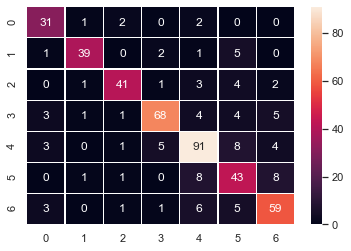

In [638]:
if best_model == 1:
    
    X_test_count = cv.transform(X_test)

    y_pred = nbClassifier1.predict(X_test_count)
    acc_score = round(accuracy_score(y_test, y_pred),4)
    conf_matrix = confusion_matrix(y_test, y_pred )
    print("The confusion matrix of our best model(model 1) is :" + '\n')
    print(conf_matrix )
    print('\n' + "Below is a visual representation of the confusion matrix")
    sns.heatmap(conf_matrix, annot=True, linewidths=.1)
    print("The model has an accuracy of " + str(round(100*acc_score,2)) + "%")
    
elif best_model == 2:
    X_test_count = cv.transform(X_test)

    y_pred = nbClassifier2.predict(X_test_count)
    acc_score = round(accuracy_score(y_test, y_pred),4)
    conf_matrix = confusion_matrix(y_test, y_pred )
    print("The confusion matrix of our best model(model 2) is :" + '\n')
    print(conf_matrix )
    print('\n' + "Below is a visual representation of the confusion matrix")
    sns.heatmap(conf_matrix, annot=True, linewidths=.1)
    print("The model has an accuracy of " + str(round(100*acc_score,2)) + "%")

elif best_model == 3:
    X_test_count = cv.transform(X_test)

    y_pred = nbClassifier3.predict(X_test_count)
    acc_score = round(accuracy_score(y_test, y_pred),4)
    conf_matrix = confusion_matrix(y_test, y_pred )
    print("The confusion matrix of our best model(model 3) is :" + '\n')
    print(conf_matrix )
    print('\n' + "Below is a visual representation of the confusion matrix")
    sns.heatmap(conf_matrix, annot=True, linewidths=.1)
    print("The model has an accuracy of " + str(round(100*acc_score,2)) + "%")

elif best_model == 4:
    X_test_count = cv.transform(X_test)

    y_pred = nbClassifier4.predict(X_test_count)
    acc_score = round(accuracy_score(y_test, y_pred),4)
    conf_matrix = confusion_matrix(y_test, y_pred )
    print("The confusion matrix of our best model(model 4) is :" + '\n')
    print(conf_matrix )
    print('\n' + "Below is a visual representation of the confusion matrix")
    sns.heatmap(conf_matrix, annot=True, linewidths=.1)
    print("The model has an accuracy of " + str(round(100*acc_score,2)) + "%")

elif best_model == 5:
    X_test_count = cv.transform(X_test)

    y_pred = nbClassifier5.predict(X_test_count)
    acc_score = round(accuracy_score(y_test, y_pred),4)
    conf_matrix = confusion_matrix(y_test, y_pred )
    print("The confusion matrix of our best model(model 5) is :" + '\n')
    print(conf_matrix )
    print('\n' + "Below is a visual representation of the confusion matrix")
    sns.heatmap(conf_matrix, annot=True, linewidths=.1)
    print("The model has an accuracy of " + str(round(100*acc_score,2)) + "%")

elif best_model == 6:
    X_test_count = cv.transform(X_test)

    y_pred = nbClassifier6.predict(X_test_count)
    acc_score = round(accuracy_score(y_test, y_pred),4)
    conf_matrix = confusion_matrix(y_test, y_pred )
    print("The confusion matrix of our best model(model 6) is :" + '\n')
    print(conf_matrix )
    print('\n' + "Below is a visual representation of the confusion matrix")
    sns.heatmap(conf_matrix, annot=True, linewidths=.1)
    print("The model has an accuracy of " + str(round(100*acc_score,2)) + "%")


# 2.d)

## From our original confusion matrix with smoothing value = 1, we can see that book 4 and book 6 are mostly confused with each other. This tells us that these books are most similar to each other. We think JK Rowling's writing style has changed over the years but not that much as some of his books have some sort of similarity. 

## Certain books might be confused with each other due to the main characters used in the books as most of them contain similar characters.

# Question 3



In [740]:
nums = np.zeros(65, dtype=int)
s = 1
t = 0
for i in range(65):
    nums[i] = i+1
    

digits = pd.read_csv("https://github.com/Phaswamotse/Machine-Learning/raw/master/smalldigits.csv", names = nums)
print("below is the first 5 rows in our dataset")
digits.head(5)


,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,2
3,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4


In [741]:
#convert our dataset into an array so it can be fed into the model
digits = digits.to_numpy()

#use the first 80% of the dataset as the training data and the last 20% as testing data

x_train = digits[:1438, :63]
y_train = digits[:1438, 64]

x_test = digits[1438:1797, :63]
y_test = digits[1438:1797, 64]
 
    


In [742]:
x_test.shape

(359, 63)

In [743]:
import matplotlib.pyplot as pt

clf = MultinomialNB(alpha=1.0)

clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Our model has an accuracy of: 0.7967
Its confusion matrix is given below
[[33  1  0  0  0  0  0  0  1  0]
 [ 0 20  0  0  1  0  0  0  8  7]
 [ 1  1 30  0  0  0  0  0  2  0]
 [ 0  3  1 24  0  1  0  2  4  2]
 [ 0  0  0  0 33  0  0  1  3  0]
 [ 0  0  0  0  0 31  1  0  0  5]
 [ 0  2  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  2  1  0 31  2  0]
 [ 0  6  0  0  1  0  0  1 23  2]
 [ 0  2  0  2  0  2  0  4  1 26]]

This means that the model has a 79.67% chance of predicting the output of the data being fed into it correctly

Here's the confusion matrix in its visual form 


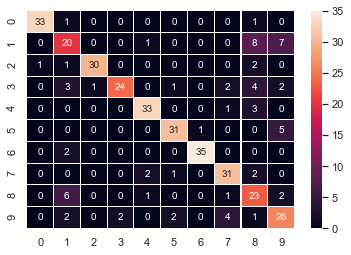

In [744]:
y_pred = clf.predict(x_test)

acc_score = round(accuracy_score(y_test, y_pred),4)
conf_matrix = confusion_matrix(y_test, y_pred )
print("Our model has an accuracy of: " + str(acc_score) + '\n' + "Its confusion matrix is given below")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, linewidths=.1)

print('\n' + "This means that the model has a " + str(round(100*acc_score,2)) + "% chance of predicting the output of the data being fed into it correctly" )

print('\n' + "Here's the confusion matrix in its visual form ")

## The above results produced by the model are quite reasonable as there were many digits predicted correctly and we can confidently say that it's a good model in general.

## The results might be improved by using a different split ratio, say maybe a 70/30 split to better get a clear indication of how well it is perfoming.